In [1]:
# packages used in this tutorial 
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For cluster graphics
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [2]:
#Dataset 
df = pd.read_csv('12kr2.csv')
#print(df.head())
print(df.columns)

Index(['FOUND_BY', 'DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIOCONCENTRATION_FACTOR_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur',
       'number

In [3]:
#Correlation Analysis below uses code from https://realpython.com/numpy-scipy-pandas-correlation-python/#example-scipy-correlation-calculation

In [4]:
array=['MONOISOTOPIC_MASS', 'Number of Carbons', 'Number of Fluorines',
       'Contains N', 'Contains O',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIOCONCENTRATION_FACTOR_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'Acid Group', 'Hyde Group',
       'Carbon Ring Group', 'Alcohol Group', 'Ether Linkage',
       'Linear Vs. Branched', 'ide', 'ate', 'ite', 'sodium', 'polymer',
       'telomer', 'nitrile', 'Bis', 'Amide', 'Amine', 'Si', 'Sulfur']
results = ''
for x in array:
    j=df[x].values.astype(float)
    for y in array:
        h=df[y].values.astype(float)
        a=scipy.stats.pearsonr(j, h)
        b=scipy.stats.spearmanr(j, h)
        c=scipy.stats.kendalltau(j, h)
        newresults='{},{},{}'.format(a[0],b[0],c[0])
        results = results+newresults
        print("The Pearson's correlation between:{} and {} is {}".format(x,y,a)) # Pearson's r
        print("The Spearman's correlation between:{} and {} is {}".format(x,y,b))   # Spearman's rho
        print("The Kendall's correlation between:{} and {} is {}".format(x,y,c))  # Kendall's tau
results=sorted(results.split(','),reverse=True)
print(results)


The Pearson's correlation between:MONOISOTOPIC_MASS and MONOISOTOPIC_MASS is (0.9999999999999999, 0.0)
The Spearman's correlation between:MONOISOTOPIC_MASS and MONOISOTOPIC_MASS is SpearmanrResult(correlation=1.0, pvalue=0.0)
The Kendall's correlation between:MONOISOTOPIC_MASS and MONOISOTOPIC_MASS is KendalltauResult(correlation=1.0, pvalue=0.0)
The Pearson's correlation between:MONOISOTOPIC_MASS and Number of Carbons is (0.8059999869325868, 0.0)
The Spearman's correlation between:MONOISOTOPIC_MASS and Number of Carbons is SpearmanrResult(correlation=0.7725527469358894, pvalue=0.0)
The Kendall's correlation between:MONOISOTOPIC_MASS and Number of Carbons is KendalltauResult(correlation=0.5940342732177321, pvalue=0.0)
The Pearson's correlation between:MONOISOTOPIC_MASS and Number of Fluorines is (0.8683507212722273, 0.0)
The Spearman's correlation between:MONOISOTOPIC_MASS and Number of Fluorines is SpearmanrResult(correlation=0.8258594044620304, pvalue=0.0)
The Kendall's correlation b

Correlation of biodegredation and bioconcentration is 0.07496655698041282, the p-value is 3.777903894727467e-11
Correlation of bioconcentration and monoisotopic is 0.17012778503646478, the p-value is 1.7357636217946714e-51
Correlation of biodegredation and monoisotopic is 0.2100841966509473, the p-value is 3.812660651138265e-78
Correlation of biodegredation and boiling_point_degCd is 0.244938157377634, the p-value is 2.118850665967206e-106
Correlation of biodegredation and average mass is 0.3769769464458472, the p-value is 1.3338494857560774e-260
Correlation of average mass and monoisotopic is 0.11680535591146031, the p-value is 5.497653842567951e-25
[[1.    0.075 0.21 ]
 [0.075 1.    0.17 ]
 [0.21  0.17  1.   ]]


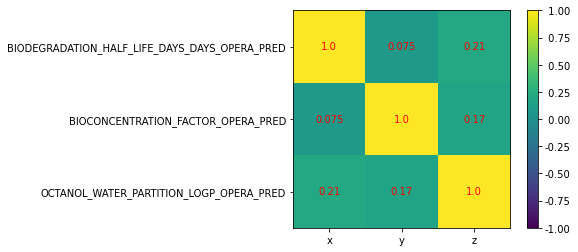

[[1.    0.17  0.142]
 [0.17  1.    0.559]
 [0.142 0.559 1.   ]]


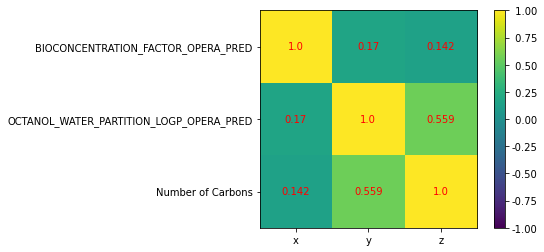

[[1.    0.559 0.117]
 [0.559 1.    0.048]
 [0.117 0.048 1.   ]]


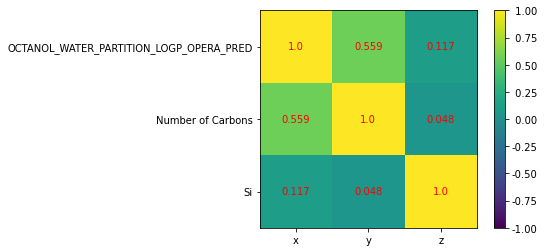

In [5]:
xyz=np.array(df[['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED','BIOCONCENTRATION_FACTOR_OPERA_PRED','OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED','Number of Carbons','Si']])
#print(xyz[:,0]) #this is biodegredation half-life days.
#print(xyz.T[0,:]) #this is also biodegredation half-life days.
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,1]) #biodegredation and bioconcentration correct correlation, verified with for loop above.
print('Correlation of biodegredation and bioconcentration is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,1],xyz[:,2]) #bioconcentration and monoisotopic correct correlation, verified with for loop above.
print('Correlation of bioconcentration and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,2]) #biodegredation and monoisotopic correct correlation, verified with for loop above.
print('Correlation of biodegredation and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,3]) #biodegredation and boiling_point_degC correct correlation, verified with for loop above.
print('Correlation of biodegredation and boiling_point_degCd is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,4]) #biodegredation and average mass correct correlation, verified with for loop above.
print('Correlation of biodegredation and average mass is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,2],xyz[:,4]) #average mass and monoisotopic correct correlation, verified with for loop above.
print('Correlation of average mass and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
array = [0,1,2]
for i in array:
    corr_matrix = np.corrcoef(xyz.T[i:i+3,:]).round(decimals=3) #correlation matrix for 3 by 3 features
    print(corr_matrix)
    fig, ax = plt.subplots()
    im = ax.imshow(corr_matrix)
    im.set_clim(-1, 1)
    ax.grid(False)
    a='x'
    b='y'
    c='z'
    if i==0: 
        a='BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED' 
        b='BIOCONCENTRATION_FACTOR_OPERA_PRED' 
        c='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'
    if i==1: 
        a='BIOCONCENTRATION_FACTOR_OPERA_PRED' 
        b='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED' 
        c='Number of Carbons'
    if i==2: 
        a='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'
        b='Number of Carbons'
        c='Si'
    if i==3: 
        a='Number of Carbons'
        b='Si'
    if i==4: 
        a='Si'
    ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
    ax.yaxis.set(ticks=(0, 1, 2), ticklabels=(a, b, c))
    ax.set_ylim(2.5, -0.5)
    for i in range(3):
        for j in range(3):
            ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                    color='r')
    cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
    plt.show()

Correlation of biodegredation and bioconcentration is 0.07496655698041282, the p-value is 3.777903894727467e-11
Correlation of bioconcentration and monoisotopic is -0.004401071533636571, the p-value is 0.6982687033290232
Correlation of biodegredation and monoisotopic is 0.3769769464458472, the p-value is 1.3338494857560774e-260
Correlation of biodegredation and boiling_point_degCd is 0.244938157377634, the p-value is 2.118850665967206e-106
Correlation of biodegredation and average mass is 0.2100841966509473, the p-value is 3.812660651138265e-78
Correlation of average mass and monoisotopic is 0.11680535591146031, the p-value is 5.497653842567951e-25
[[ 1.     0.075  0.377]
 [ 0.075  1.    -0.004]
 [ 0.377 -0.004  1.   ]]


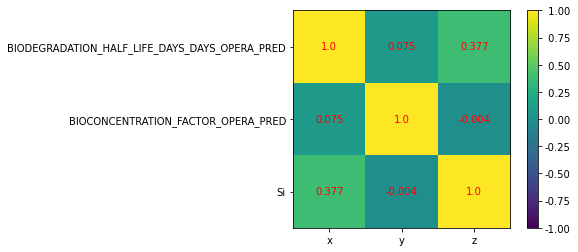

[[ 1.    -0.004  0.142]
 [-0.004  1.     0.048]
 [ 0.142  0.048  1.   ]]


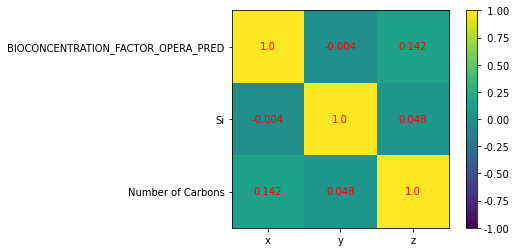

[[1.    0.048 0.117]
 [0.048 1.    0.559]
 [0.117 0.559 1.   ]]


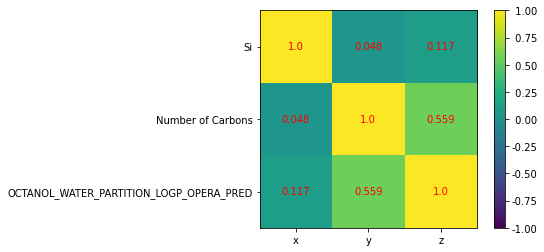

In [6]:
xyz=np.array(df[['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED','BIOCONCENTRATION_FACTOR_OPERA_PRED','Si','Number of Carbons','OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED']])
#print(xyz[:,0]) #this is biodegredation half-life days.
#print(xyz.T[0,:]) #this is also biodegredation half-life days.
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,1]) #biodegredation and bioconcentration correct correlation, verified with for loop above.
print('Correlation of biodegredation and bioconcentration is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,1],xyz[:,2]) #bioconcentration and monoisotopic correct correlation, verified with for loop above.
print('Correlation of bioconcentration and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,2]) #biodegredation and monoisotopic correct correlation, verified with for loop above.
print('Correlation of biodegredation and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,3]) #biodegredation and boiling_point_degC correct correlation, verified with for loop above.
print('Correlation of biodegredation and boiling_point_degCd is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,4]) #biodegredation and average mass correct correlation, verified with for loop above.
print('Correlation of biodegredation and average mass is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,2],xyz[:,4]) #average mass and monoisotopic correct correlation, verified with for loop above.
print('Correlation of average mass and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
array = [0,1,2]
for i in array:
    corr_matrix = np.corrcoef(xyz.T[i:i+3,:]).round(decimals=3) #correlation matrix for 3 by 3 features
    print(corr_matrix)
    fig, ax = plt.subplots()
    im = ax.imshow(corr_matrix)
    im.set_clim(-1, 1)
    ax.grid(False)
    a='x'
    b='y'
    c='z'
    if i==0: 
        a='BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED' 
        b='BIOCONCENTRATION_FACTOR_OPERA_PRED' 
        c='Si'
    if i==1: 
        a='BIOCONCENTRATION_FACTOR_OPERA_PRED' 
        b='Si' 
        c='Number of Carbons'
    if i==2: 
        a='Si'
        b='Number of Carbons'
        c='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'
    if i==3: 
        a='Number of Carbons'
        b='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'
    if i==4: 
        a='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'
    ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
    ax.yaxis.set(ticks=(0, 1, 2), ticklabels=(a, b, c))
    ax.set_ylim(2.5, -0.5)
    for i in range(3):
        for j in range(3):
            ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                    color='r')
    cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
    plt.show()

Correlation of biodegredation and bioconcentration is 0.07496655698041282, the p-value is 3.777903894727467e-11
Correlation of bioconcentration and monoisotopic is 0.14154170281584588, the p-value is 5.086944425728528e-36
Correlation of biodegredation and monoisotopic is 0.244938157377634, the p-value is 2.118850665967206e-106
Correlation of biodegredation and boiling_point_degCd is 0.2100841966509473, the p-value is 3.812660651138265e-78
Correlation of biodegredation and average mass is 0.3769769464458472, the p-value is 1.3338494857560774e-260
Correlation of average mass and monoisotopic is 0.047750437717517843, the p-value is 2.5721810691758075e-05
[[1.    0.075 0.245]
 [0.075 1.    0.142]
 [0.245 0.142 1.   ]]


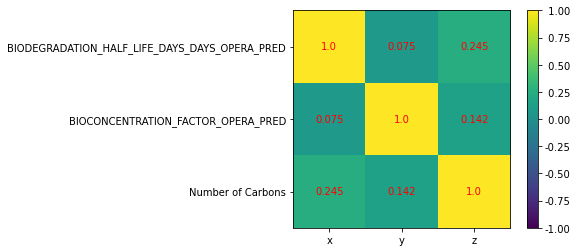

[[1.    0.142 0.17 ]
 [0.142 1.    0.559]
 [0.17  0.559 1.   ]]


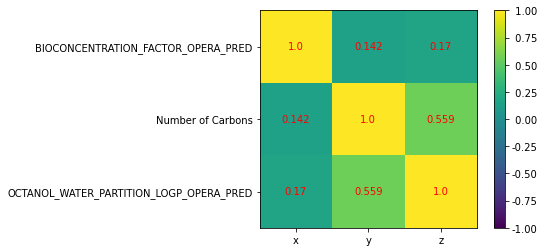

[[1.    0.559 0.048]
 [0.559 1.    0.117]
 [0.048 0.117 1.   ]]


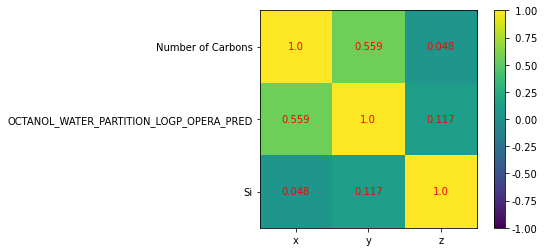

In [7]:
xyz=np.array(df[['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED','BIOCONCENTRATION_FACTOR_OPERA_PRED','Number of Carbons','OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED','Si']])
#print(xyz[:,0]) #this is biodegredation half-life days.
#print(xyz.T[0,:]) #this is also biodegredation half-life days.
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,1]) #biodegredation and bioconcentration correct correlation, verified with for loop above.
print('Correlation of biodegredation and bioconcentration is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,1],xyz[:,2]) #bioconcentration and monoisotopic correct correlation, verified with for loop above.
print('Correlation of bioconcentration and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,2]) #biodegredation and monoisotopic correct correlation, verified with for loop above.
print('Correlation of biodegredation and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,3]) #biodegredation and boiling_point_degC correct correlation, verified with for loop above.
print('Correlation of biodegredation and boiling_point_degCd is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,0],xyz[:,4]) #biodegredation and average mass correct correlation, verified with for loop above.
print('Correlation of biodegredation and average mass is {}, the p-value is {}'.format(corr_matrix, p_matrix))
corr_matrix, p_matrix = scipy.stats.pearsonr(xyz[:,2],xyz[:,4]) #average mass and monoisotopic correct correlation, verified with for loop above.
print('Correlation of average mass and monoisotopic is {}, the p-value is {}'.format(corr_matrix, p_matrix))
array = [0,1,2]
for i in array:
    corr_matrix = np.corrcoef(xyz.T[i:i+3,:]).round(decimals=3) #correlation matrix for 3 by 3 features
    print(corr_matrix)
    fig, ax = plt.subplots()
    im = ax.imshow(corr_matrix)
    im.set_clim(-1, 1)
    ax.grid(False)
    a='x'
    b='y'
    c='z'
    if i==0: 
        a='BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED' 
        b='BIOCONCENTRATION_FACTOR_OPERA_PRED' 
        c='Number of Carbons'
    if i==1: 
        a='BIOCONCENTRATION_FACTOR_OPERA_PRED' 
        b='Number of Carbons' 
        c='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'
    if i==2: 
        a='Number of Carbons'
        b='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'
        c='Si'
    if i==3: 
        a='OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'
        b='Si'
    if i==4: 
        a='Si'
    ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
    ax.yaxis.set(ticks=(0, 1, 2), ticklabels=(a, b, c))
    ax.set_ylim(2.5, -0.5)
    for i in range(3):
        for j in range(3):
            ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                    color='r')
    cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
    plt.show()

/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


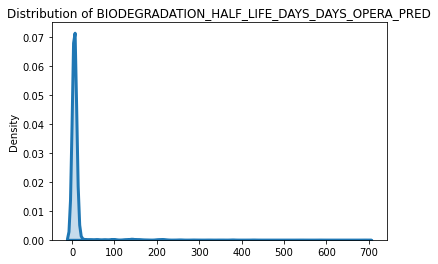

/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


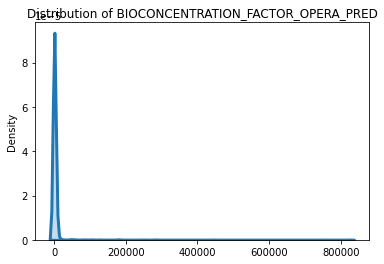

/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


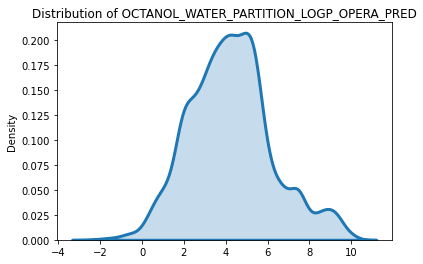

/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


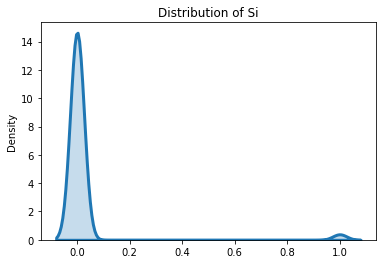

/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


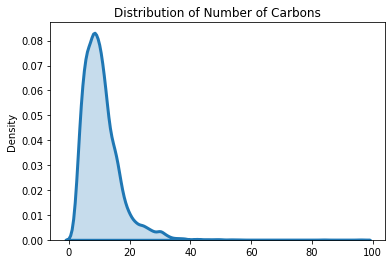

/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


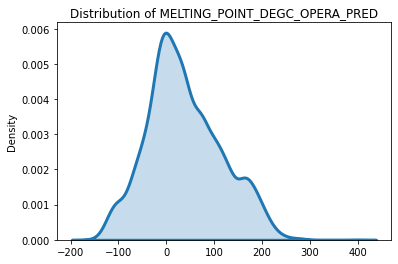

/Users/isabelayepes/opt/anaconda3/envs/keras/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


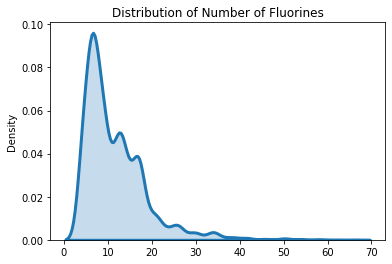

In [8]:
# Get an idea of the distribution
features=['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED','BIOCONCENTRATION_FACTOR_OPERA_PRED','OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED', 'Si', 'Number of Carbons', 'MELTING_POINT_DEGC_OPERA_PRED', 'Number of Fluorines']
for i in features:
    j=df[i].values.astype(float)
    %matplotlib inline 
    sns.distplot(j, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}).set(title='Distribution of '+i)
    plt.show()

In [9]:
print(df.shape)

(7761, 41)


In [10]:
print(df.dtypes)

FOUND_BY                                                             object
DTXSID                                                               object
PREFERRED_NAME                                                       object
CASRN                                                                object
MOLECULAR_FORMULA                                                    object
MONOISOTOPIC_MASS                                                   float64
Number of Carbons                                                     int64
Number of Fluorines                                                   int64
Contains N                                                            int64
Contains O                                                            int64
ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED    float64
BIOCONCENTRATION_FACTOR_OPERA_PRED                                  float64
BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED                       float64
BOILING_POIN

In [11]:
#if running again this clears old column
if 'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES' in df.columns:
    df= df.drop(labels='BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES', axis=1)
#add a new column to df for halflife category low (between 0 and 3.9), medium (greater than 3.9 up to 4.5), high (greater than 4.5 up to 9). 
category = pd.cut(df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED'],bins=[0,3.9,4.5,9],labels=[0,1,2])
df.insert(5,'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES',category)
#df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_BINARY'] = np.where(df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED']>4.5, 1, 0)
y= df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES']
#print(y)
#Analyzes category distribution
df['BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES'].value_counts(normalize=True)

2    0.408468
1    0.331660
0    0.259872
Name: BIODEGRADATION_HALF_LIFE_DAYS_DAYS_CATEGORIES, dtype: float64

In [12]:
array = ['Number of Fluorines','Number of Carbons','Contains N','Contains O','Contains S']
for a in array:
# let's only use the top two features from v2ref74 model, MONOISOTOPIC_MASS and Number of Fluorines
    b='MONOISOTOPIC_MASS'
    #print(df[a].dtypes,df[b].dtypes)
    df[a]=df[a].values.astype(int)
    #print(df[a].dtypes,df[b].dtypes)
    x=df[[a,b]]
    #print(x)
    # Create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
    clf.fit(x, y);
    # Plot the decision boundary
    xx, yy = np.meshgrid(np.arange(x.iloc[:, 0].min(), x.iloc[:, 0].max()+0.2, 0.2),
                         np.arange(x.iloc[:, 1].min(), x.iloc[:, 1].max()+0.2, 0.2))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(b+ ' vs '+a)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').